# Descriptive statistics of Sysmo


Here I need to show all the descriptive stadistics by project, group and all the collaboration.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from ggplot import *
import json
%pylab inline
%load_ext rpy2.ipython
%reload_ext rpy2.ipython
##%load_ext rmagic
import pylab

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Load the Data


In [2]:
%%R

par(family="serif", las=1, ps=18)

source('~/Dropbox/case_sysmo/Scripts/userSysmo.R')
source('~/Dropbox/case_sysmo/Scripts/assetsSysmo.R')
source('~/Dropbox/case_sysmo/Scripts/projectSysmo.r')
source('~/Dropbox/case_sysmo/Scripts/sharedAssetSysmo.r')
source('~/Dropbox/case_sysmo/Scripts/contrastCodeSysmo.r')
source('~/Dropbox/case_sysmo/Scripts/parallelsetGeneral.r')
# source('~/Dropbox/case_sysmo/Scripts/projectsDbM.r')
# source('~/Dropbox/case_sysmo/Scripts/sharingSymo.r')
# library(plotrix)
library(psych)
library(ggplot2)
library(data.table)
library(MASS)

secndR<- as.Date("2010-03-01")  # http://www.bbsrc.ac.uk/pa/grants/AwardDetails.aspx?FundingReference=BB%2FI004637%2F1
eval10<- as.Date("2010-05-01")  # http://www.bbsrc.ac.uk/pa/grants/AwardDetails.aspx?FundingReference=BB%2FI004637%2F1
eval11<- as.Date("2011-02-01")  
eval12<- as.Date("2012-05-01")  # https://seek.sysmo-db.org/presentations/38
eval13<- as.Date("2013-03-01")  # https://seek.sysmo-db.org/presentations/85

eval1<-eval11
eval2<-eval12


/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘ggplot2’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:psych’:

    %+%, alpha


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: data.table 1.9.6  For help type ?data.table or https://github.com/Rdatatable/data.table/wiki

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The fastest way to learn (by data.table authors): https://www.datacamp.com/courses/data-analysis-the-data-table-way

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [3]:
%%R

processCsv <- function(filename){
  r <- read.csv(file=paste0("/Users/kristian/Dropbox/case_sysmo/Data/Sysmo/",filename,".csv"),sep=",",head=TRUE)
  if(length(r$created_at) > 1){
    r$ncreated_at <- as.Date(r$created_at)     
  }
  if(length(r$updated_at) > 1){
    r$nupdated_at <- as.Date(r$updated_at)
  }
  if(length(r$contributor_id) > 1){
    r<-r[r$contributor_id != "NULL", ]
  }
  return(r)
}

# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  require(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

## Tenure Analysis

> Claim: Scientist with larger tenure are more effective than scientists with shorter tenure at sharing [#nov_motivational_2009].

Constructs:

- Tenure: the amount of time since they had joined the community [#nov_motivational_2009]. *****
- Dataset Sharing Behaviour: Ratio of Open access assets a users contributes to the system.
- Dataset Contributions: Number of assets a users contributes to the system. *****

> ***** My scripts uses this definition.



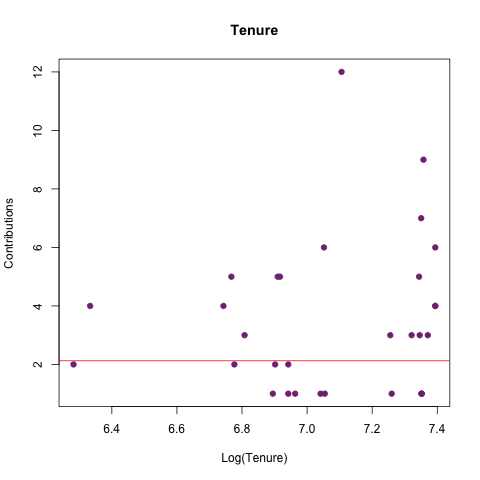

In [4]:
%%R
graphTenure()

## Annual reviews to data sharing Analysis

> Claim: (CL2) Scientists shared data mostly for material and extrinsic reasons. Presence of extrinsic and material motivations helps achievement of data sharing when XXXX

> Claim: (CL3) These materialist scientists shared only when they were engaged by external factors. Introducing external crises helps the achievement of data sharing when XXXX
Constructs:

- Extrinsic Motivations: such as annual reviews or mandates.*
- Dataset Sharing Behaviour: Ratio of Open access assets a users contributes to the system.
- Dataset Contributions: Number of assets a users contributes to the system. *****

> ***** My scripts uses this definition.



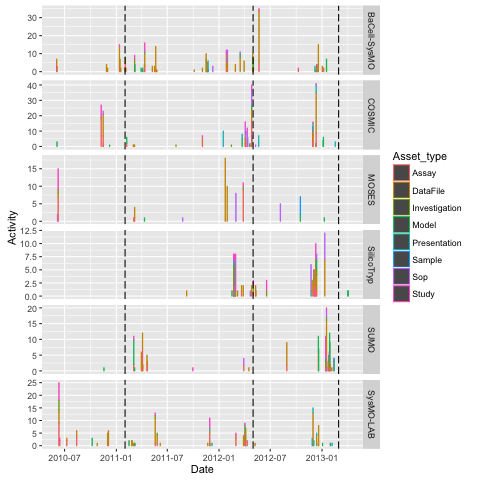

In [8]:
%%R
getLogBy("create",239)


## Projects Descriptive Information

- Diversity
- Files size
- Files contributed
- name

In [6]:
%%R
projectContBySize()

/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: permute

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: lattice

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: This is vegan 2.3-2

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: reldist: Relative Distribution Methods
Version 1.6-4 created on 2015-01-01.
copyright (c) 2003, Mark S. Handcock, University of California-Los Angeles
 For citation information, type citation("reldist").
 Type help(package="reldist") to get started.


  res = super(Function, self).__call__(*new_args, **new_kwargs)


[1] "I need contributor_id guessDiscipline"
           name project_id    siz Freq id loc_shannon  loc_gini lang_shannon
1  BaCell-SysMO          1  53760   69  1    4.644811 0.2852961     4.701184
2        COSMIC          2  79360   50  2    4.135367 0.1178571     4.099547
3         MOSES          8 139620   10  8    3.090360 0.2169811     3.017447
4   Noisy-Strep         15  53760    3 15    1.055381 0.1565996     1.021728
5        PSYSMO          6  12135    9  6    3.434429 0.3671432     3.583476
6    SilicoTryp         14  53760   12 14    3.357855 0.1548387     3.338622
7        STREAM         10 609792    8 10    1.820778 0.2735043     1.894710
8      SulfoSys         11 872849    6 11    2.491183 0.2136095     2.466172
9          SUMO          3  78336   38  3    3.964531 0.2699507     4.011719
10     SysMO DB         12 105728   34 12    2.826948 0.2686335     2.941424
11    SysMO-LAB          5  74496   46  5    4.885787 0.2598015     4.950155
12  TRANSLUCENT          9  5596

In [ ]:
%%R

processSharingReportDiscipline('model',5)